In [14]:
import glworia.amplification_factor
import glworia.lens_functions
from glworia.amplification_factor import *
from glworia.lens_functions import *
import glworia.lens_functions
from glworia.lens_functions import *
import glworia.contour
from glworia.contour import *
import glworia.utils
from glworia.utils import *
import glworia.root
from glworia.root import *
import glworia.plot
from glworia.plot import *
import glworia.frequency_domain
from glworia.frequency_domain import *
import glworia.interpolate
from glworia.interpolate import *
import glworia.load_interp
from glworia.load_interp import *
import glworia.lens_model
from glworia.lens_model import *

In [15]:
from importlib import reload

In [16]:
reload(glworia.amplification_factor)
reload(glworia.lens_functions)
from glworia.amplification_factor import *
from glworia.lens_functions import *
reload(glworia.lens_functions)
from glworia.lens_functions import *
reload(glworia.contour)
from glworia.contour import *
reload(glworia.utils)
from glworia.utils import *
reload(glworia.root)
from glworia.root import *
reload(glworia.plot)
from glworia.plot import *
reload(glworia.frequency_domain)
from glworia.frequency_domain import *
reload(glworia.interpolate)
from glworia.interpolate import *
reload(glworia.load_interp)
from glworia.load_interp import *
reload(glworia.lens_model)
from glworia.lens_model import *

In [17]:
import matplotlib as mpl

plt.rc('text', usetex=False)
plt.rc('font', family='qpl')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['ytick.minor.size'] = 2

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.labeltop'] = plt.rcParams['ytick.labelright'] = False
mpl.rcParams['axes.unicode_minus'] = False

params = {'axes.labelsize': 18,
          'font.family': 'serif',
          'font.size': 9,
          'legend.fontsize': 12,
          'xtick.labelsize': 11,
          'ytick.labelsize': 11,
          'savefig.dpi': 200,
          'lines.markersize': 6,
          'axes.formatter.limits': (-3, 3)}

mpl.rcParams.update(params)

In [18]:
from jax.config import config
config.update("jax_enable_x64", True)

In [19]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import random

In [20]:
# use tex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [21]:
lp_name = 'kappa'

settings = {
    'lens_param_name': lp_name,
    'y_low': 0.1,
    'y_high': 5.0,
    lp_name + '_low': 0.1,
    lp_name + '_high': 10.,
    'N_grid': 101,
    'N_grid_strong': 201,
    'N_crit': 201,
    'N': 200,
    'lens_model_name': 'NFW',

    'T0_max': 1000,

    'y_low_im': 0.1,
    'y_high_im': 5.0,
    lp_name + '_low_im': 0.1,
    lp_name + '_high_im': 10.,
    'N_grid_im': 1000,
    'N_crit_im': 1000,
}

grid_settings = settings.copy()
grid_settings['lp_low'] = settings[lp_name + '_low']
grid_settings['lp_high'] = settings[lp_name + '_high']
grid_settings.update(
    crit_lp_N = 100000,
    crit_bisect_x_low = -10,
    crit_bisect_x_high = 10,
    crit_bisect_x_num = 100,
    crit_screen_round_decimal = 8)

In [22]:
weak_points, strong_points, crit_points_in_bound, _, lp_to_y_crit = make_grid_points(grid_settings)

In [23]:
lp_arr = np.linspace(settings[lp_name + '_low'], settings[lp_name + '_high'], settings['N_grid'])

In [24]:
y_crit_arr = lp_to_y_crit(lp_arr)
fac = 0.2
y_crit_low_arr = y_crit_arr - fac
y_crit_high_arr = y_crit_arr + fac

In [25]:
strong_points_list = []
weak_points_list = []
crit_points_in_bound_list = []
lp_arr_list = []
y_crit_low_arr_list = []
y_crit_high_arr_list = []

strong_points_list.append(strong_points)
weak_points_list.append(weak_points)
crit_points_in_bound_list.append(crit_points_in_bound)
lp_arr_list.append(lp_arr)
y_crit_low_arr_list.append(y_crit_low_arr)
y_crit_high_arr_list.append(y_crit_high_arr)

Text(0, 0.5, '$\\kappa$')

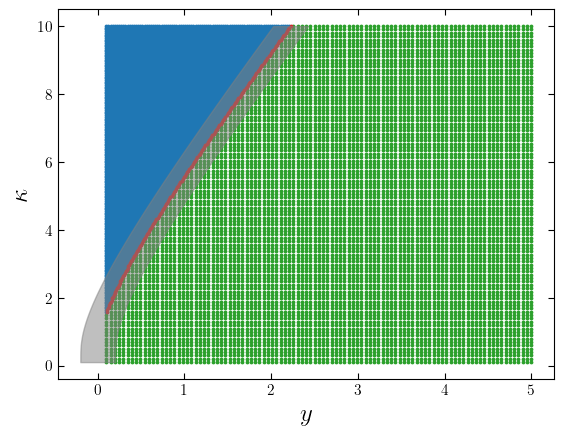

In [26]:
fig, ax = plt.subplots()
ax.scatter(strong_points.T[0], strong_points.T[1], s = 3)
ax.scatter(weak_points.T[0], weak_points.T[1], s = 3, c = 'C2')
ax.scatter(crit_points_in_bound.T[0], crit_points_in_bound.T[1], s = 3, c = 'C3')
ax.fill_betweenx(lp_arr, y_crit_low_arr, y_crit_high_arr, alpha = 0.5, color = 'gray')

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$\kappa$')

In [27]:
# Psi_func = Psi_gSIS
# T_funcs, helper_funcs = amplification_computation_prep(Psi_func)

In [28]:
# @partial(jnp.vectorize, signature = '(),()->()')
# def y_crit_override_gSIS(y_crit, lens_params):
#     lens_params = jnp.atleast_1d(lens_params)
#     return jax.lax.cond(jnp.abs(lens_params[0] - 1.) < 1e-15, 
#                         lambda _: jnp.ones_like(y_crit), 
#                         lambda _: jax.lax.cond(lens_params[0] > 1.,
#                                                lambda _: jnp.ones_like(y_crit)*jnp.inf, 
#                                                lambda _: y_crit, 
#                                                None),
#                         None)

    
# bisection_1D_var_2D = make_bisection_1D_var_2D()
# bisection_1D_cond_fun = make_bisection_1D_cond_fun(1e-13)
# bisection_1D_step_fun = make_bisection_1D_step_fun(T_funcs["dT_1D"])

# # @partial(jnp.vectorize, signature = '(3),(),()->(3)')
# def x_im_nan_sub_gSIS(x_im, y0, lens_params):
#     lens_params = jnp.atleast_1d(lens_params)
#     x_im = jax.lax.cond(jnp.isnan(x_im[0]) & (lens_params[0] > 1.), 
#                         lambda x_im: x_im.at[0].set(
#                             bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
#                                                 -0.1, -1e-14, 
#                                                 bisection_1D_cond_fun, 
#                                                 bisection_1D_step_fun, 
#                                                 y0, lens_params[0])
#                         ), 
#                         lambda x_im: x_im, 
#                         operand = x_im)
#     x_im = jax.lax.cond(jnp.isnan(x_im[1]) & (lens_params[0] < 1.), 
#                         lambda x_im: x_im.at[1].set(
#                             bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
#                                                 -0.1, -1e-14, 
#                                                 bisection_1D_cond_fun, 
#                                                 bisection_1D_step_fun, 
#                                                 y0, lens_params[0])
#                         ), 
#                         lambda x_im: x_im, 
#                         operand = x_im)
#     return x_im

# @partial(jnp.vectorize, signature = '(n,2)->(n)')
# def is_crit(point):
#     return jnp.abs(point[:,1] - 1.) < 1e-15

In [29]:
lp_name = 'k'

settings = {
    'lens_param_name': lp_name,
    'y_low': 0.1,
    'y_high': 5.0,
    lp_name + '_low': 0.1,
    lp_name + '_high': 1.9,
    'N_grid': 101,
    'N_grid_strong': 201,
    'N_crit': 201,
    'N': 200,
    'lens_model_name': 'gSIS',

    'T0_max': 1000,

    'y_low_im': 0.1,
    'y_high_im': 5.0,
    lp_name + '_low_im': 0.1,
    lp_name + '_high_im': 1.9,
    'N_grid_im': 1000,
    'N_crit_im': 1000,
}

grid_settings = settings.copy()
grid_settings['lp_low'] = settings[lp_name + '_low']
grid_settings['lp_high'] = settings[lp_name + '_high']
grid_settings.update(
    crit_lp_N = 100000,
    crit_bisect_x_low = -10,
    crit_bisect_x_high = 10,
    crit_bisect_x_num = 100,
    crit_screen_round_decimal = 8)

In [30]:
# irregular_crit_points_dict = {
#     'irregular_crit_points': jnp.array([[1., 1.]]),
#     'irregular_y_crit_points': jnp.array([1.]),
#     'irregular_x_crit_points': jnp.array([0.]),
#     'irregular_lp_crit_points': jnp.array([1.])
# }

In [31]:
weak_points, strong_points, crit_points_in_bound, _, lp_to_y_crit = make_grid_points(
                                    grid_settings,)

                                    # y_crit_override = y_crit_override_gSIS,
                                    # irregular_crit_points_dict = irregular_crit_points_dict,
                                    # add_to_strong = is_crit)

In [32]:
lp_arr = np.linspace(settings[lp_name + '_low'], settings[lp_name + '_high'], 5*settings['N_grid'])

In [33]:
lp_arr_low = lp_arr[lp_arr < 0.9999]
y_crit_arr = lp_to_y_crit(lp_arr_low)
lp_arr_low = np.concatenate([lp_arr_low, np.array([1.])])
y_crit_arr = np.concatenate([y_crit_arr, np.array([1.])])
fac = 0.15
y_crit_low_arr = y_crit_arr - fac
y_crit_high_arr = y_crit_arr + fac

In [34]:
strong_points_list.append(strong_points)
weak_points_list.append(weak_points)
crit_points_in_bound_list.append(crit_points_in_bound)
lp_arr_list.append(lp_arr_low)
y_crit_low_arr_list.append(y_crit_low_arr)
y_crit_high_arr_list.append(y_crit_high_arr)

Text(0, 0.5, '$\\kappa$')

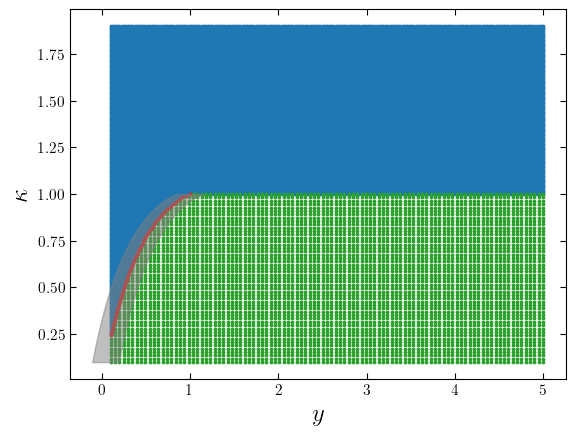

In [35]:
fig, ax = plt.subplots()
ax.scatter(strong_points.T[0], strong_points.T[1], s = 3)
ax.scatter(weak_points.T[0], weak_points.T[1], s = 3, c = 'C2')
ax.scatter(crit_points_in_bound.T[0], crit_points_in_bound.T[1], s = 3, c = 'C3')
ax.fill_betweenx(lp_arr_low, y_crit_low_arr, y_crit_high_arr, alpha = 0.5, color = 'gray')

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$\kappa$')

In [36]:
Psi_func = Psi_CIS
T_funcs, helper_funcs = amplification_computation_prep(Psi_func)

In [37]:
@partial(jnp.vectorize, signature = '(),()->()')
def y_crit_override_CIS(y_crit, lens_params):
    lens_params = jnp.atleast_1d(lens_params)
    y_crit = jax.lax.cond(lens_params[0] < 1e-15,
                          lambda y_crit: 1.,
                          lambda y_crit: y_crit,
                          operand = y_crit)
    return y_crit

def y_crit_override_default(y_crit, lens_params):
    return y_crit

def origin_type_CIS(lens_params):
    if jnp.abs(lens_params[0]) > 1e-15:
        origin = 'regular'
    else:
        origin = 'cusp'
    return origin

bisection_1D_var_2D = make_bisection_1D_var_2D()
bisection_1D_cond_fun = make_bisection_1D_cond_fun(1e-13)
bisection_1D_step_fun = make_bisection_1D_step_fun(T_funcs['dT_1D'])

# @partial(jnp.vectorize, signature = '(3),(),()->(3)')
def x_im_nan_sub_CIS(x_im, y0, lens_params):
    lens_params = jnp.atleast_1d(lens_params)
    x_im = jax.lax.cond(jnp.isnan(x_im[1]) & (lens_params[0] > 0) & (y0 < 1.),
                        lambda x_im: x_im.at[1].set(
                            bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
                                                -0.1, -1e-14, 
                                                bisection_1D_cond_fun, 
                                                bisection_1D_step_fun, 
                                                y0, lens_params[0])
                        ), 
                        lambda x_im: x_im, 
                        operand = x_im)
    return x_im

In [38]:
lp_name = 'xc'

settings = {
    'lens_param_name': lp_name,
    'y_low': 0.1,
    'y_high': 5.0,
    lp_name + '_low': 0.,
    lp_name + '_high': 1.,
    'N_grid': 101,
    'N_grid_strong': 201,
    'N_crit': 201,
    'N': 200,
    'lens_model_name': 'CIS',

    'T0_max': 1000,

    'y_low_im': 0.1,
    'y_high_im': 5.0,
    lp_name + '_low_im': 0.,
    lp_name + '_high_im': 1.,
    'N_grid_im': 1000,
    'N_crit_im': 1000,
}

grid_settings = settings.copy()
grid_settings['lp_low'] = settings[lp_name + '_low']
grid_settings['lp_high'] = settings[lp_name + '_high']
grid_settings.update(
    crit_lp_N = 100000,
    crit_bisect_x_low = -10,
    crit_bisect_x_high = 10,
    crit_bisect_x_num = 100,
    crit_screen_round_decimal = 8)

In [39]:
irregular_crit_points_dict = {
    'irregular_crit_points': jnp.array([[1., 0.]]),
    'irregular_y_crit_points': jnp.array([1.]),
    'irregular_x_crit_points': jnp.array([0.]),
    'irregular_lp_crit_points': jnp.array([0.])
}

In [41]:
weak_points, strong_points, crit_points_in_bound, _, lp_to_y_crit = make_grid_points(
                                    grid_settings,)
                                    # y_crit_override = y_crit_override_CIS,
                                    # irregular_crit_points_dict = irregular_crit_points_dict)

In [42]:
lp_arr = np.linspace(settings[lp_name + '_low'], settings[lp_name + '_high'], 5*settings['N_grid'])

In [43]:
# lp_arr_low = lp_arr[lp_arr < 0.9999]
y_crit_arr = lp_to_y_crit(lp_arr)
lp_arr = np.concatenate([np.array([0.]), lp_arr])
y_crit_arr = np.concatenate([np.array([1.]), y_crit_arr])
fac = 0.15
y_crit_low_arr = y_crit_arr - fac
y_crit_high_arr = y_crit_arr + fac

In [44]:
strong_points_list.append(strong_points)
weak_points_list.append(weak_points)
crit_points_in_bound_list.append(crit_points_in_bound)
lp_arr_list.append(lp_arr)
y_crit_low_arr_list.append(y_crit_low_arr)
y_crit_high_arr_list.append(y_crit_high_arr)

(0.0, 5.249890244430628)

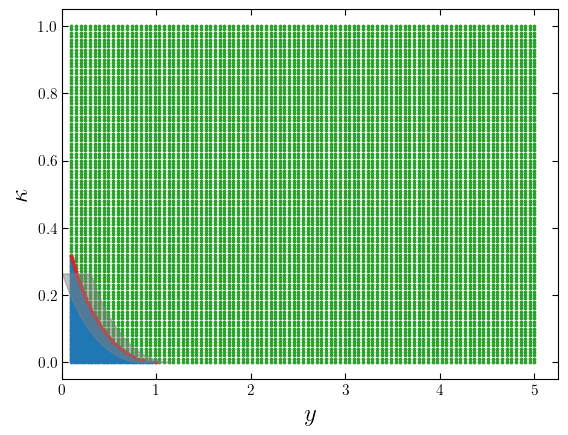

In [45]:
fig, ax = plt.subplots()
ax.scatter(strong_points.T[0], strong_points.T[1], s = 3)
ax.scatter(weak_points.T[0], weak_points.T[1], s = 3, c = 'C2')
ax.scatter(crit_points_in_bound.T[0], crit_points_in_bound.T[1], s = 3, c = 'C3')
ax.fill_betweenx(lp_arr[y_crit_low_arr > 0], y_crit_low_arr[y_crit_low_arr > 0], y_crit_high_arr[y_crit_low_arr > 0], alpha = 0.5, color = 'gray')

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$\kappa$')
ax.set_xlim(0, None)

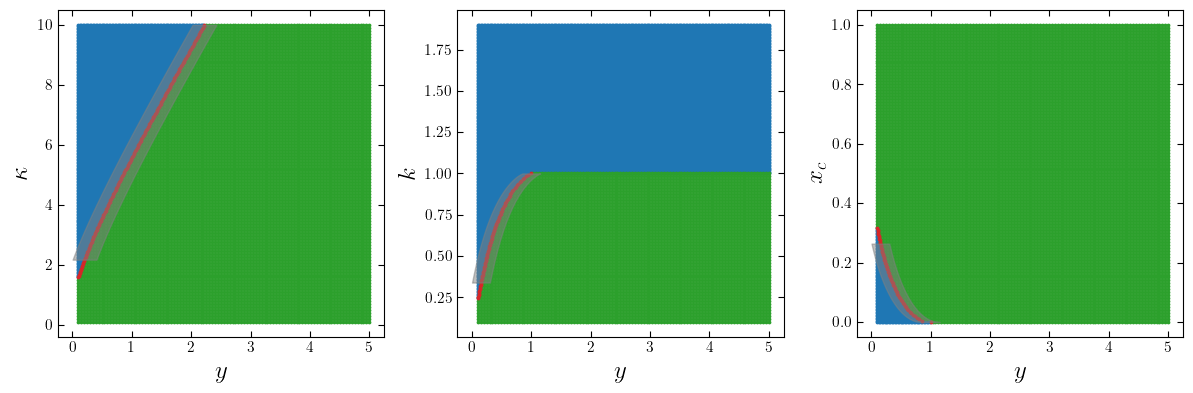

In [46]:
lp_names = ['\kappa', 'k', 'x_c']

fig, axs = plt.subplots(1, 3, figsize = (12, 4))

for i in range(3):
    axs[i].scatter(strong_points_list[i].T[0], strong_points_list[i].T[1], s = 3)
    axs[i].scatter(weak_points_list[i].T[0], weak_points_list[i].T[1], s = 3, c = 'C2')
    axs[i].scatter(crit_points_in_bound_list[i].T[0], crit_points_in_bound_list[i].T[1], s = 3, c = 'C3')
    axs[i].fill_betweenx(lp_arr_list[i][y_crit_low_arr_list[i] > 0], y_crit_low_arr_list[i][y_crit_low_arr_list[i] > 0], y_crit_high_arr_list[i][y_crit_low_arr_list[i] > 0], alpha = 0.5, color = 'gray')

    axs[i].set_xlabel(r'$y$')
    axs[i].set_ylabel(r'${}$'.format(lp_names[i]))

    fig.tight_layout()